In [11]:
#Import all necessary columns 
import numpy as np
import pandas as pd # for DataFrames
import matplotlib as plt # For data visualisation
import seaborn as sns # For heatmaps and correlation matrix
from sklearn.preprocessing import MinMaxScaler # For data visualisation

In [12]:
'''comment why you are doing something and what you are doing on all commands'''
#Load dataset into Jupyter notebook
path = r"C:\Users\OttosMum\Documents\aiml_cwk_dataset_only\all_stocks_5yr_new.csv"
df = pd.read_csv(path) #Load dataset into a dataframe


In [13]:
df.head() #Print first 5 columns of dataset
print(df.columns) #Print columns of dataset in order to verify dataset has loaded correctly into Jupyter notebook

,date,open,high,low,close,volume,stock_Name
0,08/02/2013,15.07,15.12,14.63,14.75,8407500,AAL
1,11/02/2013,14.89,15.01,14.26,14.46,8882000,AAL
2,12/02/2013,14.45,14.51,14.10,14.27,8126000,AAL
3,13/02/2013,14.30,14.94,14.25,14.66,10259500,AAL
4,14/02/2013,14.94,14.96,13.16,13.99,31879900,AAL


In [11]:
import pandas as pd # Reimport pandas library to use DataFrames

# Load the dataset into the DataFrame 'df'
df = pd.read_csv('X:\\Artificial Intelligence and Machine Learning\\Semester 1\\all_stocks_5yr_new(in).csv')  # Replace with the correct path to your dataset

# Display the basic information about the dataset
print("Basic Information about S&P 500 Dataset") #Title for Basic Information Table
print("Please see the output of basic defining metrics of Kaggle's S&P500 Dataset, including Non-Null value count, datatype (DType) and column name/number") #Specify table contents
print(df.info())  # Print basic information about the DataFrame



Basic Information about S&P 500 Dataset
Please see the output of basic defining metrics of Kaggle's S&P500 Dataset, including Non-Null value count, datatype (DType) and column name/number
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   date        619040 non-null  object 
 1   open        619027 non-null  float64
 2   high        619029 non-null  float64
 3   low         619027 non-null  float64
 4   close       619039 non-null  float64
 5   volume      619040 non-null  int64  
 6   stock_Name  619040 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 33.1+ MB
None


In [15]:
# Get general statistics about the dataset
print("Basic Statistics about S&P 500 Dataset") # Title for statistics table
print("Please see the output of basic statistics of Kaggle's S&P500 Dataset, including count, mean, standard deviation, minmax values, quartiles 1-3") #Specify specific statistical metrics for statistics table 
print(df.describe()) # Print basic stats about the dataset



                open           high            low          close  \
count  619027.000000  619029.000000  619027.000000  619039.000000   
mean       83.023366      83.778505      82.255948      83.043873   
std        97.378907      98.207685      96.507689      97.389788   
min         1.620000       1.690000       1.500000       1.590000   
25%        40.220000      40.620000      39.830000      40.245050   
50%        62.590000      63.150000      62.020000      62.620000   
75%        94.370000      95.180000      93.535750      94.410000   
max      2044.000000    2067.990000    2035.110000    2049.000000   

             volume  
count  6.190400e+05  
mean   4.321823e+06  
std    8.693610e+06  
min    0.000000e+00  
25%    1.070320e+06  
50%    2.082094e+06  
75%    4.284509e+06  
max    6.182376e+08  
date           object
open          float64
high          float64
low           float64
close         float64
volume          int64
stock_Name     object
dtype: object


In [24]:
# Check the data types of each column
print(df.dtypes) #Print outputs

date           object
open          float64
high          float64
low           float64
close         float64
volume          int64
stock_Name     object
dtype: object


In [41]:
#DATA CLEANING - DATA PRE=PROCESSING PHASE ONE
print("Data Cleaning: Check for missing and duplicates, convert categorical to appropriate format")
#Check for missing values and forward fill missing values (replace with previous values)
df.fillna(method='ffill', inplace=True)
print(df.isnull().sum()) # Check for missing values

# Drop any rows with missing values 
df = df.dropna()

# Check for duplicates
print(f"Duplicate rows: {df.duplicated().sum()}")


Data Cleaning: Check for missing and duplicates, convert categorical to appropriate format
open          0
high          0
low           0
close         0
volume        0
stock_Name    0
dtype: int64
Duplicate rows: 754


In [37]:
# Check if 'date' is the index
print(df.index)  # Display the index to verify it contains the 'date' values

# Convert the index to datetime
df.index = pd.to_datetime(df.index, format='%d/%m/%Y', errors='coerce')

# Verify the conversion
print(df.index)



DatetimeIndex(['2013-02-08', '2013-02-11', '2013-02-12', '2013-02-13',
               '2013-02-14', '2013-02-15', '2013-02-19', '2013-02-20',
               '2013-02-21', '2013-02-22',
               ...
               '2018-01-25', '2018-01-26', '2018-01-29', '2018-01-30',
               '2018-01-31', '2018-02-01', '2018-02-02', '2018-02-05',
               '2018-02-06', '2018-02-07'],
              dtype='datetime64[ns]', name='date', length=619040, freq=None)
DatetimeIndex(['2013-02-08', '2013-02-11', '2013-02-12', '2013-02-13',
               '2013-02-14', '2013-02-15', '2013-02-19', '2013-02-20',
               '2013-02-21', '2013-02-22',
               ...
               '2018-01-25', '2018-01-26', '2018-01-29', '2018-01-30',
               '2018-01-31', '2018-02-01', '2018-02-02', '2018-02-05',
               '2018-02-06', '2018-02-07'],
              dtype='datetime64[ns]', name='date', length=619040, freq=None)


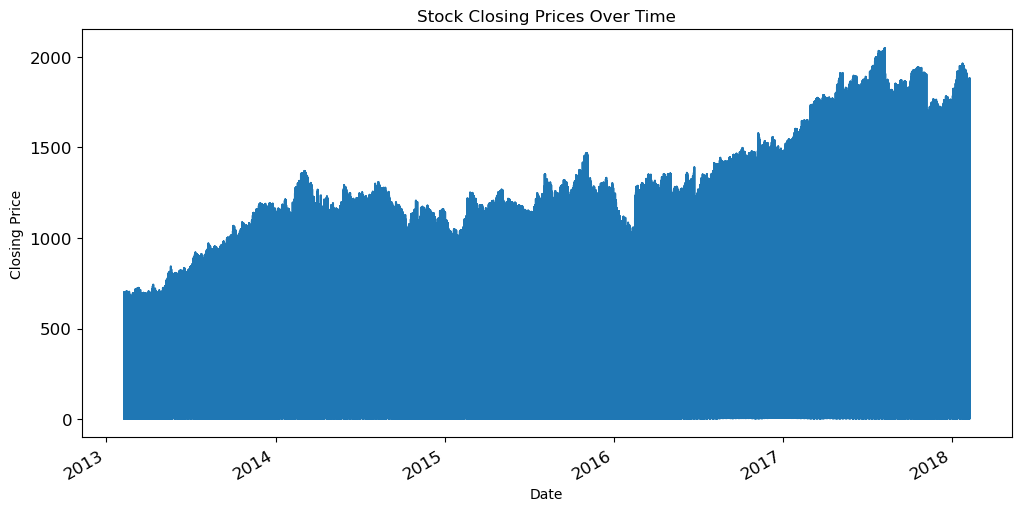

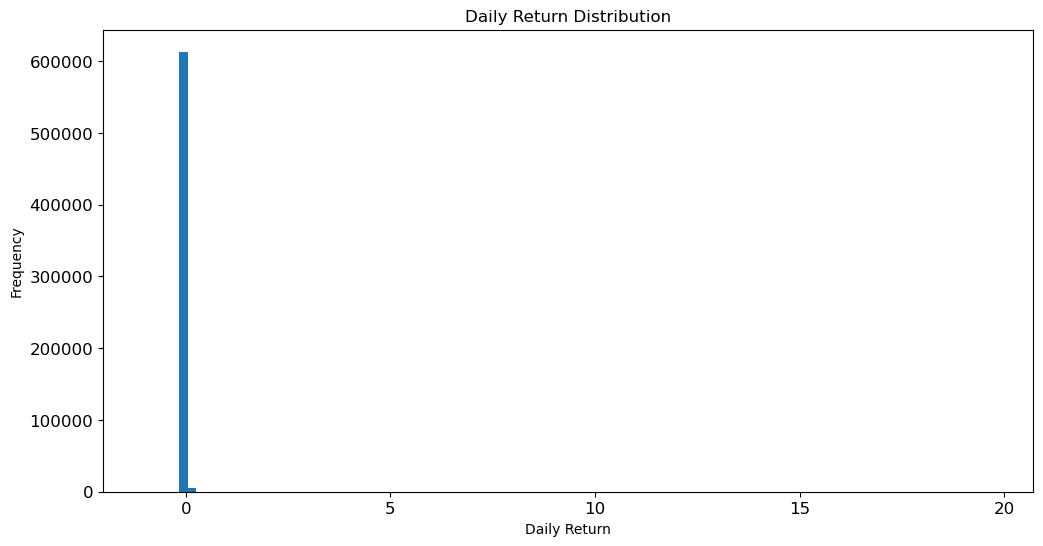

In [48]:
 # EXPLORATORY DATA ANALYSIS AND DATA VISUALISATION

import matplotlib.pyplot as plt  #Reimport to reduce chance of error

# Plot the closing prices of the stock
ax = df['close'].plot(figsize=(12, 6), title='Stock Closing Prices Over Time', fontsize=12) #Provide a lin

# Set labels for axes
ax.set_xlabel('Date')  # Set x-axis label
ax.set_ylabel('Closing Price')  # Set y-axis label

# Ensure that the plot is rendered properly
plt.show()  # This should display the plot


# 2. Plotting the distribution of daily returns (percentage change)
df['Daily Return'] = df['close'].pct_change()  # Calculate percentage change (daily return)
df['Daily Return'].plot(kind='hist', bins=100, figsize=(12, 6), title='Daily Return Distribution', fontsize=12)
plt.xlabel('Daily Return')
plt.show()




C:\Users\OttosMum\AppData\Local\Temp\ipykernel_8724\1548249597.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


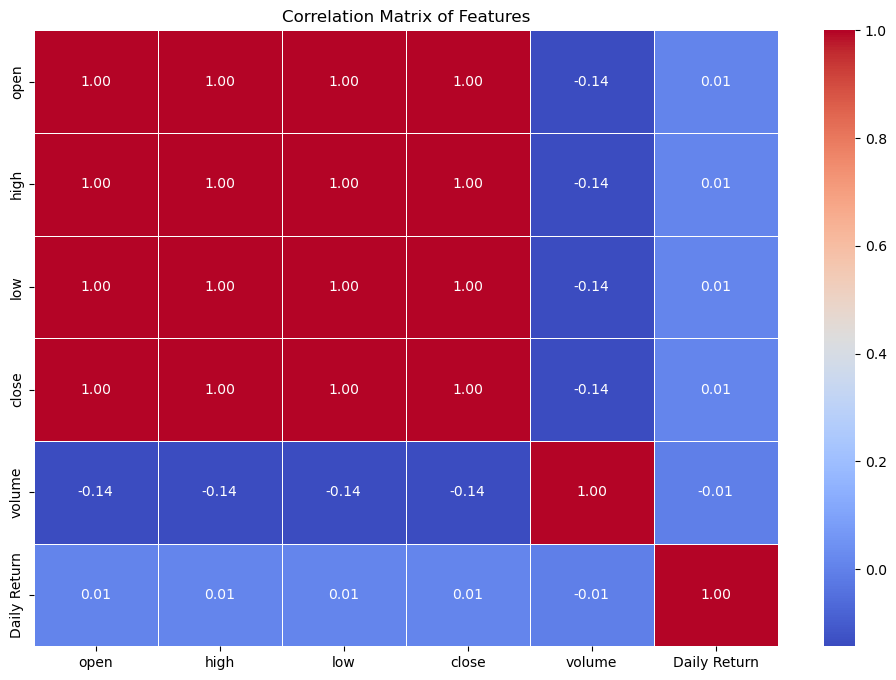

In [49]:
#FEATURE SELECTION - CORRELATION MATRIX
# Correlation Matrix - Heatmap for numerical columns 
correlation = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()

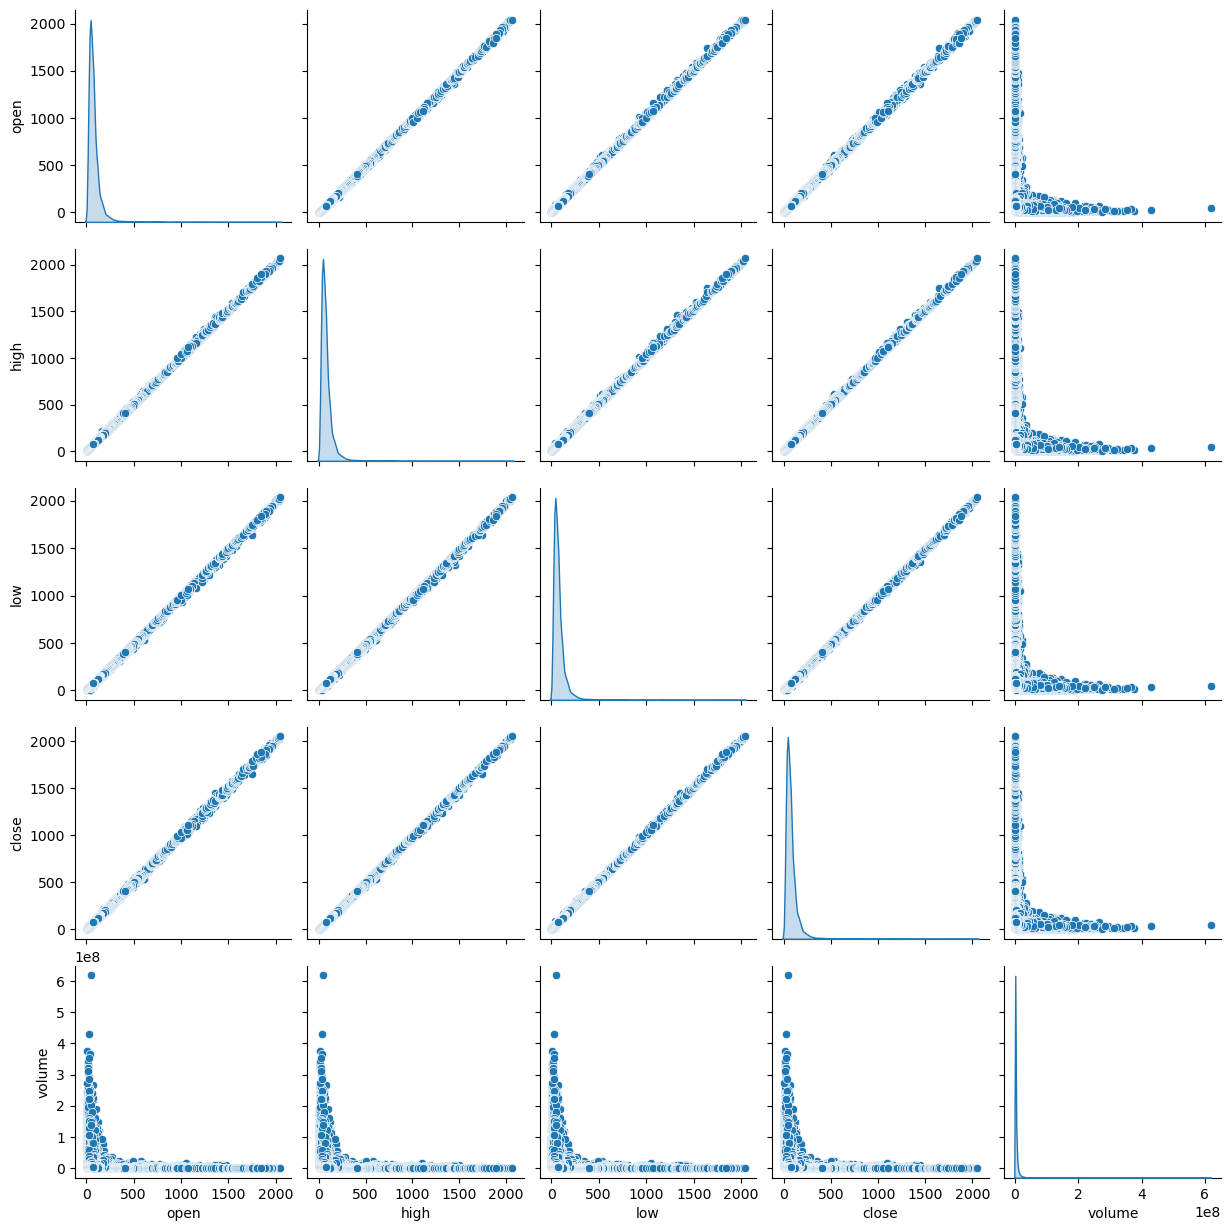

In [51]:
# 4. Pairplot for selected features (e.g., Open, High, Low, Close, Volume)
sns.pairplot(df[['open', 'high', 'low', 'close', 'volume']], diag_kind='kde')
plt.show()

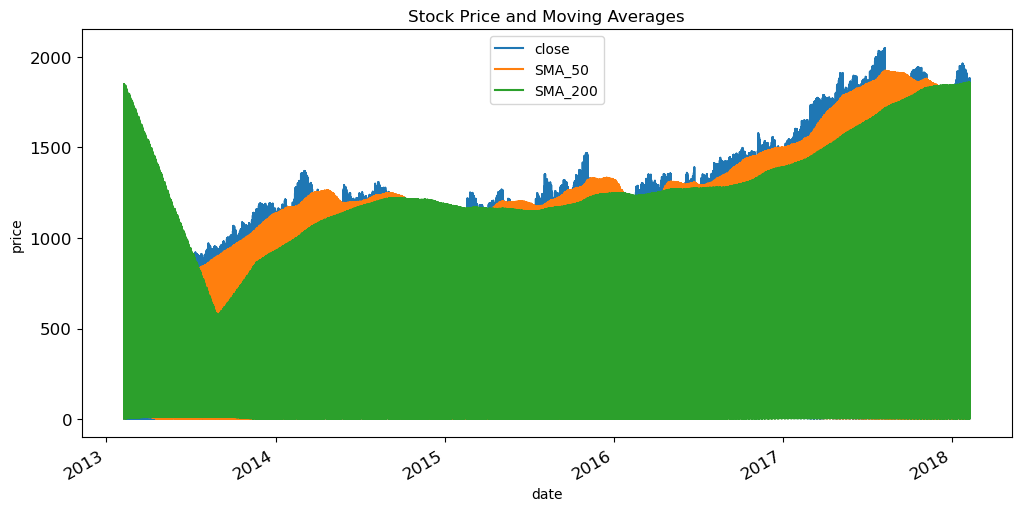

In [53]:
# 5. Moving Averages (Simple Moving Average)
window_size = 50
df['SMA_50'] = df['close'].rolling(window=window_size).mean()  # 50-day moving average
df['SMA_200'] = df['close'].rolling(window=200).mean()  # 200-day moving average
df[['close', 'SMA_50', 'SMA_200']].plot(figsize=(12, 6), title='Stock Price and Moving Averages', fontsize=12)
plt.xlabel('date')
plt.ylabel('price')
plt.show()

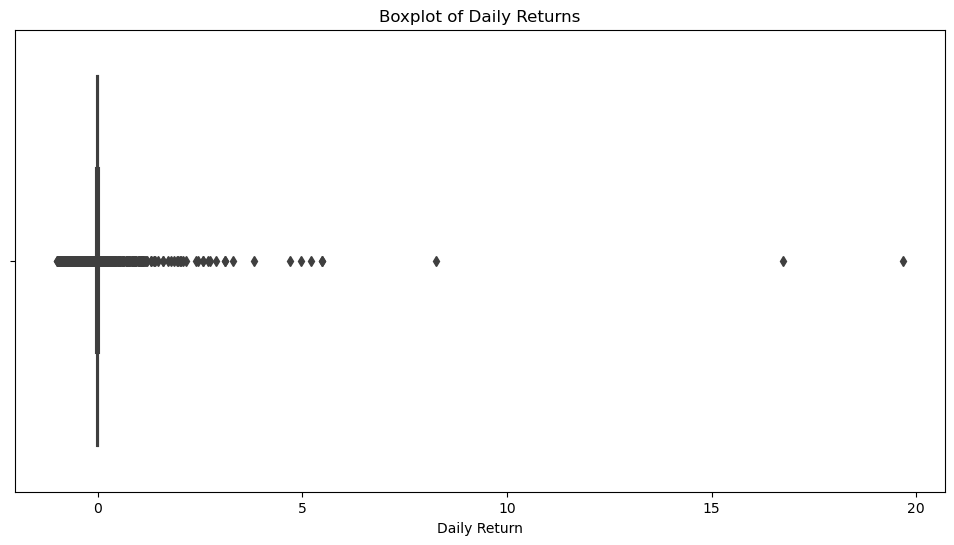

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with the desired size
plt.figure(figsize=(12, 6))

# Boxplot of daily returns to detect outliers
sns.boxplot(x=df['Daily Return'])

# Set the title and labels
plt.title('Boxplot of Daily Returns')
plt.show()


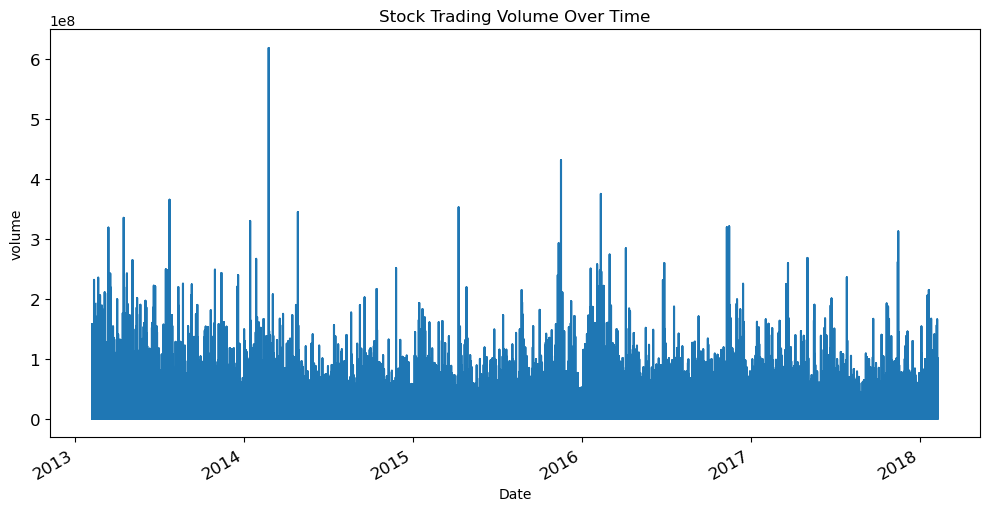

In [57]:
# Visualizing Stock Volume Trends
df['volume'].plot(figsize=(12, 6), title='Stock Trading Volume Over Time', fontsize=12)
plt.xlabel('Date')
plt.ylabel('volume')
plt.show()

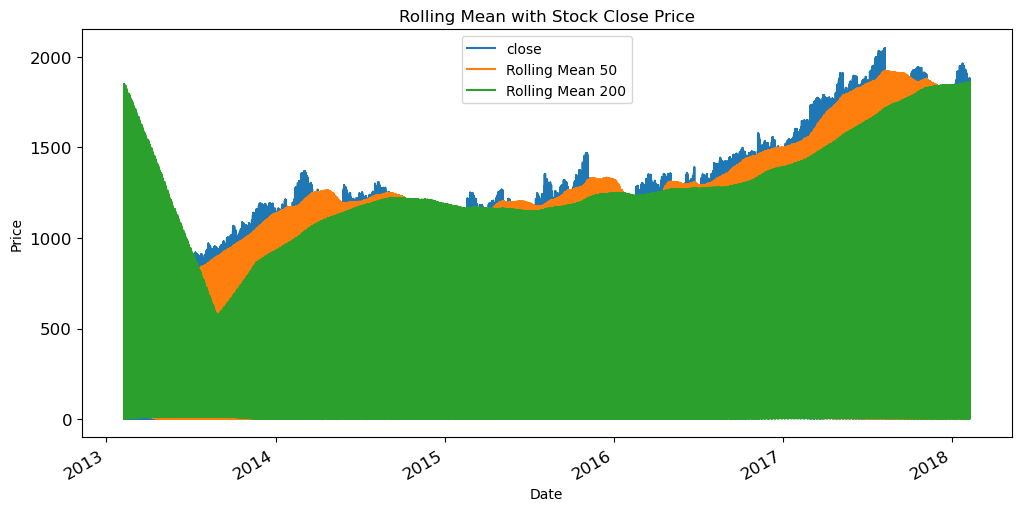

In [60]:
# Checking for seasonality or trend components with a rolling mean
df['Rolling Mean 50'] = df['close'].rolling(window=50).mean()
df['Rolling Mean 200'] = df['close'].rolling(window=200).mean()
df[['close', 'Rolling Mean 50', 'Rolling Mean 200']].plot(figsize=(12, 6), title='Rolling Mean with Stock Close Price', fontsize=12)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

Outliers handled successfully!


C:\Users\hp022399\AppData\Local\Temp\ipykernel_19540\2423203698.py:41: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = features_only.corr()


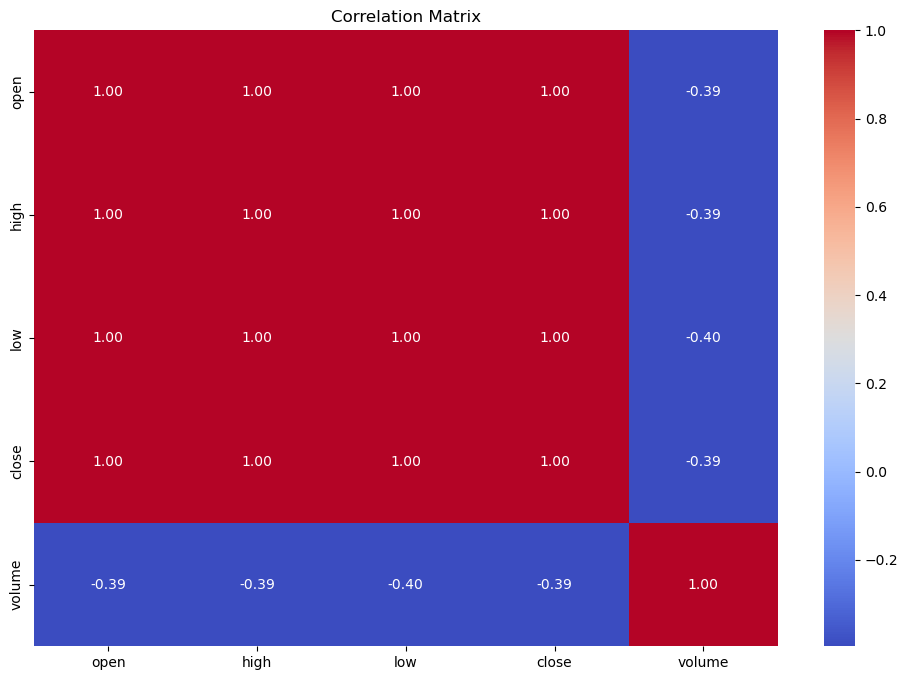

Highly correlated features to drop (threshold=0.85): {'high', 'close', 'low'}


In [12]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold


# Load the dataset into the DataFrame 'df'
df = pd.read_csv('X:\\Artificial Intelligence and Machine Learning\\Semester 1\\all_stocks_5yr_new(in).csv')  # Replace with the correct path to your dataset

# 1. Handling Outliers using the IQR method
def handle_outliers(df, column):
    """
    Detects and handles outliers in a given column using the IQR method.
    Outliers are capped at the lower and upper bounds.
    """
    Q1 = df[column].quantile(0.25)  # First quartile
    Q3 = df[column].quantile(0.75)  # Third quartile
    IQR = Q3 - Q1  # Interquartile range
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Capping outliers to lower and upper bounds
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
    return df

# Apply outlier handling to numerical columns
numerical_columns = df.select_dtypes(include=['float64','int64']).columns

for col in numerical_columns:
    df = handle_outliers(df, col)

print("Outliers handled successfully!")

# 2. Feature Selection: Identify and Drop Highly Correlated Features
target_col = 'Daily Return'  # Replace with your target column name
features_only = df.drop(columns=[target_col], errors='ignore')

# Compute correlation matrix
correlation_matrix = features_only.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

# Function to identify highly correlated features
def get_highly_correlated_features(corr_matrix, threshold=0.85):
    correlated_features = set()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                correlated_features.add(colname)
    return correlated_features

# Set correlation threshold
threshold = 0.85
high_corr_features = get_highly_correlated_features(correlation_matrix, threshold=threshold)
print(f"Highly correlated features to drop (threshold={threshold}): {high_corr_features}")

# Drop the highly correlated features
df_reduced = df.drop(columns=high_corr_features, errors='ignore')

In [24]:
df_reduced = df_original[['date', 'open', 'volume', 'stock_Name', 'close', 'high', 'low']]


In [ ]:
#DATA PREPROCESSING - FEATURE SELECTION
#IN THIS SECTION, THE FEATURE SELECTION IS CARRIED OUT. THIS SECTION CONTAINS THE CODE EXTRACTING THE MOST SUITABLE FEATURE FOR PREDICTION, PLOTTING THE FINAL CORRELATION MATRIX 
# AND IDENTIFYING HIGHLY CORRELATED FEATURES FOR REMOVAL. THE FEATURE SELECTION IS SPLIT INTO DIFFERENT SECTIONS TO SHOW THE DIFFERENT STAGES OF FEATURE SELECTION. THESE ARE:
# 1. DATA CLEANING (IN ORDER TO REMOVE ANY MISSING OR DUPLICATE VALUES THAT DID NOT PASS THE FIRST STAGE OF DATA PREPROCESSING AND ENSURE THE DATASET IS VIABLE BEFORE UNDERGOING FEATURE SELECTION)
#2. PLOTTING THE CORRELATION MATRIX IN ORDER TO IDENTIFY AND REMOVE HIGHLY CORRELATED FEATURES IN ORDER TO 
#3. APPLYING VARIANCE THRESHOLDING, FIND FEATURES WITH HIGH VARIANCE IN ORDER TO 
#4. IDENTIFY FEATURES THAT ARE HIGHLY CORRELATED WITH THE TARGET VARIABLE (CORRELATION > 0.5) IN ORDER TO 
#5. RAIN RANDOM FOREST IN ORDER TO DETERMINE FEATURE IMPORTANCE IN ORDER TO IDENTIFY MOST SUITABLE FEATURE FOR PREDICTION
#6. FINALISE FEATURE SET AFTER REMOVING HIGHLY CORRELATED FEATURES + LOW VARIANCE FEATURES
#7. SELECT TOP N FEATURES IN ORDER TO FINALISE THE FEATURES TO BE USED FOR PREDICTION
print("Data Cleaning: Check for missing and duplicates, convert categorical to appropriate format")

#1. REMOVE DUPLICATE, MISSING OUTLIER VALUES TO CLEAN DATASET FOR VARIANCE THRESHOLDING AND RANDOMFORESTREGRESSOR FEATURE IMPORTANCE ANALYSIS

# Fill missing values using forward fill method, in order to remove NaN and ensure uniformity is maintained in the dataset, hence preventing errors and that the dataset is viable for variance thresholding and RandomForestRegressor
df.fillna(method='ffill', inplace=True)

# Check for missing values after forward filling, in order to double check for missing values and further test and verify the validity of the dataset
print(df.isnull().sum())

# Drop any remaining rows with missing values, remove any rows that still contain missing values after forward fill to finalise dataset viability through containing data in editable DataFrame
df = df.dropna()

# Check for duplicates in the dataset and return the value in order to gage the impact on dataset viability and which ones need to be removed. 
print(f"Duplicate rows: {df.duplicated().sum()}")

#Remove duplicate values in dataset through using 'drop' method in order to clean dataset of outlier values
df = df.drop_duplicates()

# Verify removal of duplicate values in order to make sure that dataset is viable for further feature selection processes otherwise an error will occur.
print(f"Number of duplicate rows after removal: {df.duplicated().sum()}")

# Display the cleaned dataset to finally verify and validate if dataset is viable for feature selection processes
print("Dataset after removing duplicates:")
print(df.head())



In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import RandomForestRegressor
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (Input, Dense, Conv1D, Flatten, LSTM, Concatenate, BatchNormalization, Dropout)
from tensorflow.keras.optimizers import Adam

# Load dataset
df = pd.read_csv('your_file_path.csv')  # Replace with your actual file path

# Step 1: Apply Variance Thresholding (Remove low variance features)
selector = VarianceThreshold(threshold=0.1)  # Threshold for variance
numerical_features = df.select_dtypes(include=['float64', 'int64'])  # Only numeric columns

# Apply the selector
X_variance_filtered = selector.fit_transform(numerical_features)
remaining_features = numerical_features.columns[selector.get_support(indices=True)].tolist()
df_variance_filtered = pd.DataFrame(X_variance_filtered, columns=remaining_features)

# Step 2: Plot Correlation Matrix and Identify Highly Correlated Features (Excluding Target)
target_col = 'close'  # Target variable (your feature of prediction)
features_only = df.drop(columns=[target_col], errors='ignore')  # Drop target column

# Calculate and plot correlation matrix
correlation_matrix = features_only.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix (Excluding Target)")
plt.show()

# Identify highly correlated features (correlation > 0.8)
correlation_threshold = 0.8
highly_correlated_features = set()

# Loop through correlation matrix and find correlated pairs
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            colname = correlation_matrix.columns[i]
            highly_correlated_features.add(colname)

# Remove highly correlated features
df_reduced = df.drop(columns=highly_correlated_features, errors='ignore')
print(f"Features after removing highly correlated ones: {df_reduced.columns.tolist()}")

# Step 3: Feature Selection Based on Correlation with Target - add ranking and then decide whether to keep values that meet threshold or not
correlation_with_target = df_reduced.corr()[target_col]  # Correlation with target
important_features = correlation_with_target[abs(correlation_with_target) > 0.5].index.tolist()  # Threshold of 0.5

print("Important features based on correlation with target:", important_features)

# Step 4: Use Random Forest to Get Feature Importance
X_final = df_reduced[important_features].drop(columns=[target_col], errors='ignore')  # Features for modelling
y_final = df_reduced[target_col]  # Target (close) variable

# Train Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_final, y_final)

# Get feature importances
importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X_final.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Output the feature importance
print("Feature Importance (from Random Forest):")
print(feature_importance_df)

# Select top N features based on importance (e.g., top 10)
top_features = feature_importance_df['Feature'].head(10).tolist()
print(f"Top selected features: {top_features}")

# Step 5: Prepare Final Feature Set (Top N Features)
df_selected_features = df_reduced[top_features + [target_col]]  # Include target column for modeling

# Final Features for Modeling:
print("Final selected features for modeling:", df_selected_features.columns.tolist())





In [ ]:
# --- CNN-LSTM Implementation ---
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (Input, Dense, Conv1D, Flatten, LSTM, 
                                      Concatenate, BatchNormalization, Dropout)
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# Define data and parameters
time_steps = 10  # Adjust based on the time window
num_features = len(top_features)  # Number of selected features

# Prepare input data
X = df_selected_features[top_features].values  # Features
y = df_selected_features[target_col].values  # Target variable

# Reshape data for sequence modeling
X_reshaped, y_reshaped = [], []
for i in range(len(X) - time_steps):
    X_reshaped.append(X[i:i+time_steps])
    y_reshaped.append(y[i+time_steps])

X_reshaped = np.array(X_reshaped)
y_reshaped = np.array(y_reshaped)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y_reshaped, test_size=0.2, random_state=42)

# Hyperparameters
cnn_filters = 64
lstm_units = 128
dropout_rate = 0.2
learning_rate = 0.001

# Model architecture
input_layer = Input(shape=(time_steps, num_features), name="Selected_Features")

# CNN Block
cnn = Conv1D(filters=cnn_filters, kernel_size=3, activation='relu', padding='same')(input_layer)
cnn = BatchNormalization()(cnn)
cnn = Dropout(dropout_rate)(cnn)
cnn = Conv1D(filters=cnn_filters * 2, kernel_size=3, activation='relu', padding='same')(cnn)
cnn = BatchNormalization()(cnn)
cnn = Dropout(dropout_rate)(cnn)
cnn = Flatten()(cnn)

# LSTM Block
lstm = LSTM(lstm_units, return_sequences=False)(input_layer)
lstm = BatchNormalization()(lstm)
lstm = Dropout(dropout_rate)(lstm)

# Combine CNN and LSTM
combined = Concatenate()([cnn, lstm])

# Output Layer
price_output = Dense(1, activation='linear')(combined)

# Compile Model
model = Model(inputs=input_layer, outputs=price_output)
model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mse', metrics=['mae'])

# Model Summary
model.summary()

# Train the Model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=32,
    verbose=1
)

# Make Predictions
y_pred = model.predict(X_test).flatten()

# Evaluate Model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("CNN-LSTM Model Performance Metrics:")
print(f"MSE: {mse:.4f}, MAE: {mae:.4f}, R²: {r2:.4f}")

# Plot Training History
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN-LSTM Training History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
#TECHNICAL IMPLEMENTATION OF RANDOM FOREST STOCK PREDICTION USING IDENTIFIED FEATURE 'CLOSE' COLUMN - THE TARGET VARIABLE
# --- Random Forest Implementation ---
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Prepare Dataset
X = df_selected_features.drop(columns=[target_col])  # Feature set (excluding target)
y = df_selected_features[target_col]  # Target variable ('close')

# Split dataset into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter Tuning
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=3,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)
best_rf_model = grid_search.best_estimator_
print("Best Parameters from GridSearchCV:", grid_search.best_params_)

# Train Optimized Random Forest
best_rf_model.fit(X_train, y_train)

# Make Predictions
y_pred = best_rf_model.predict(X_test)

# Evaluate Model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Random Forest Model Performance Metrics:")
print(f"MSE: {mse:.4f}, MAE: {mae:.4f}, R²: {r2:.4f}")

# Feature Importances
feature_importances = best_rf_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print("Feature Importances:")
print(feature_importance_df)

# Plot Feature Importances
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.title('Feature Importances from Random Forest')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



In [ ]:
#DETERMINING THE FEATURE OF PREDICTION
# Select top N features (e.g., top 10)
top_features = feature_importance_df['Feature'].head(10).tolist()
df_selected_features = df_high_variance[top_features + [close]]  # Add target back to dataset

print(f"Top selected features: {top_features}")

In [ ]:
#BENCHMARK COMPARISON
# Naïve Benchmark
naive_predictions = np.full_like(y_test, y_train.mean())  # Naive forecast uses training mean

# Evaluate Benchmark
benchmark_mse = mean_squared_error(y_test, naive_predictions)
benchmark_r2 = r2_score(y_test, naive_predictions)

print("Benchmark Performance:")
print(f"MSE: {benchmark_mse:.4f}, R²: {benchmark_r2:.4f}")

# Compare Models
print("\nModel Comparison:")
print(f"Benchmark -> MSE: {benchmark_mse:.4f}, R²: {benchmark_r2:.4f}")
print(f"Random Forest -> MSE: {mse:.4f}, R²: {r2:.4f}")
print(f"CNN-LSTM -> MSE: {mse:.4f}, R²: {r2:.4f}")



In [ ]:
#RANDOM FOREST MODEL
#